In [11]:

from model_ML import create_model_pretrain
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.applications import MobileNetV2
from keras.models import Model
from keras.layers import Dense



dim = (224,224)
n_sequence = 1
n_channels = 3
n_output = 3
batch_size = 1
weights_path = 'Sit-06-0.88-0.66.hdf5'


# model = create_model_pretrain(dim, n_sequence, n_channels, n_output, 'MobileNetV2')
# model.load_weights(weights_path)
# model = Sequential()
# model.add(MobileNet(input_shape=(*dim, n_channels), weights='imagenet',include_top=False))

def  Mymodel(backbone_model, classes):
    backbone = backbone_model
    x = backbone.output
    x = Dense(classes,activation='sigmoid')(x)
    model = Model(inputs=backbone.input, outputs=x)
    return model

input_shape = (224, 224, 3)
model = Mymodel(backbone_model=MobileNetV2(input_shape=input_shape, include_top=False, pooling='avg'),
                classes=61)

model.summary()

ise[0][0]          
__________________________________________________________________________________________________
block_6_depthwise_relu (ReLU)   (None, 14, 14, 192)  0           block_6_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_6_project (Conv2D)        (None, 14, 14, 64)   12288       block_6_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_6_project_BN (BatchNormal (None, 14, 14, 64)   256         block_6_project[0][0]            
__________________________________________________________________________________________________
block_7_expand (Conv2D)         (None, 14, 14, 384)  24576       block_6_project_BN[0][0]         
__________________________________________________________________________________________________
block_7_expand_BN (BatchNormali (None, 14, 14, 384)  1536        block_7_expand[0][0]    

In [30]:
layer_outputs = [layer.output for layer in model.layers if not layer.name.startswith('input')]

for i,layer in enumerate(layer_outputs):
    print(i, layer)

activation_model = Model(inputs=model.input, outputs=layer_outputs)


action = 'stand'
path_file = 'F:\\Master Project\\Dataset\\sit_stand\\'+action+'\\'+action+'02_02.mp4'
cap = cv2.VideoCapture(path_file)
ret, frame = cap.read()
new_image = cv2.resize(frame, dim)
new_image = new_image/255.0    

X = np.empty((batch_size, *dim, n_channels)) # X : (n_samples, *dim, n_channels)            
X[0,:,:,:] = new_image

activations = activation_model.predict(X)

0 Tensor("Conv1_pad_7/Pad:0", shape=(?, 225, 225, 3), dtype=float32)
1 Tensor("Conv1_7/convolution:0", shape=(?, 112, 112, 32), dtype=float32)
2 Tensor("bn_Conv1_1/cond/Merge:0", shape=(?, 112, 112, 32), dtype=float32)
3 Tensor("Conv1_relu_7/Relu6:0", shape=(?, 112, 112, 32), dtype=float32)
4 Tensor("expanded_conv_depthwise_1/depthwise:0", shape=(?, 112, 112, 32), dtype=float32)
5 Tensor("expanded_conv_depthwise_BN_1/cond/Merge:0", shape=(?, 112, 112, 32), dtype=float32)
6 Tensor("expanded_conv_depthwise_relu_1/Relu6:0", shape=(?, 112, 112, 32), dtype=float32)
7 Tensor("expanded_conv_project_1/convolution:0", shape=(?, 112, 112, 16), dtype=float32)
8 Tensor("expanded_conv_project_BN_1/cond/Merge:0", shape=(?, 112, 112, 16), dtype=float32)
9 Tensor("block_1_expand_1/convolution:0", shape=(?, 112, 112, 96), dtype=float32)
10 Tensor("block_1_expand_BN_1/cond/Merge:0", shape=(?, 112, 112, 96), dtype=float32)
11 Tensor("block_1_expand_relu_1/Relu6:0", shape=(?, 112, 112, 96), dtype=float32)

In [8]:
# print(model.get_layer("conv_pw_13_relu"))
# layer_outputs = [layer.output for layer in model.layers]
# for layer in layer_outputs:
#     print(layer)


In [26]:
def display_activation(activations, col_size, row_size, max_pic, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index],cmap='gray')
            activation_index += 1
            if activation_index >= max_pic:
                return

In [18]:
activation = activations[0]
print(activation.shape)
# new_activation = activation.reshape((1,7,7,1280))

(1, 225, 225, 3)


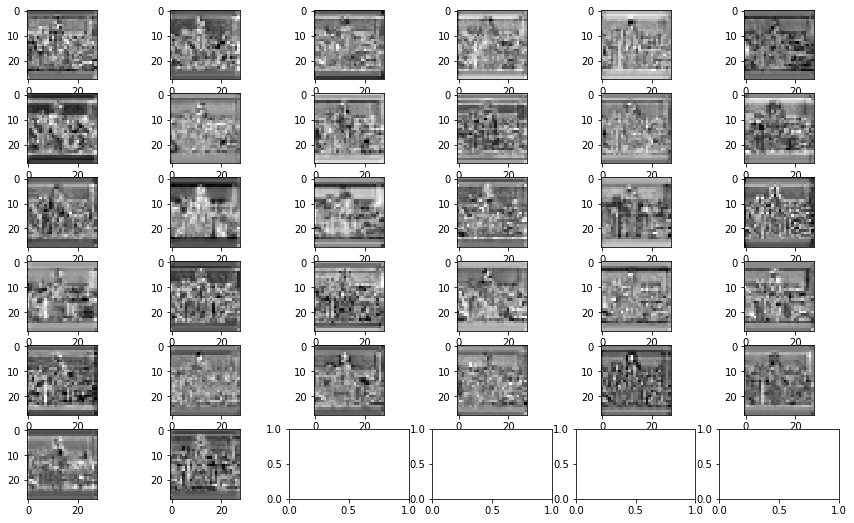

In [32]:
display_activation(activations, 6, 6, 32, 53)
# plt.imshow(activation[0,0, :, :, 0], cmap='gray')

In [0]:
plt.imshow(new_image)